In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("traffic_data.csv")
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (50, 5)
   Vehicle_ID  Latitude  Longitude  Speed   Time
0           1   18.5204    73.8567     45  07:30
1           2   18.5287    73.8746     60  09:15
2           3   18.5331    73.8455     25  08:45
3           4   18.5395    73.8780     20  18:30
4           5   18.5120    73.8300     35  19:10


In [3]:
# Step 3: Preprocessing
# Convert time to hour (integer)
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Select numeric columns for clustering
X = df[['Latitude', 'Longitude', 'Speed', 'Hour']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

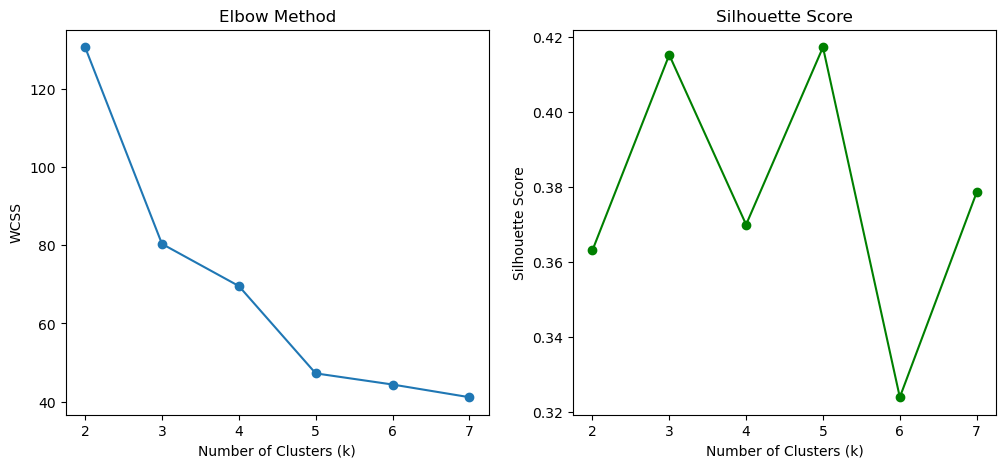

In [4]:
# Step 4: Determine Optimal Clusters
wcss = []
sil_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.show()


In [5]:
# Step 5: Apply K-Means
k = 4  # choose based on elbow/silhouette
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
# Step 6: Evaluation
silhouette = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score: {silhouette:.3f}")

print("\nAverage Speed and Hour per Cluster:")
print(df.groupby('Cluster')[['Speed', 'Hour']].mean())


Silhouette Score: 0.370

Average Speed and Hour per Cluster:
             Speed       Hour
Cluster                      
0        25.000000  18.157895
1        62.857143  14.285714
2        52.133333  10.666667
3        42.222222   9.222222


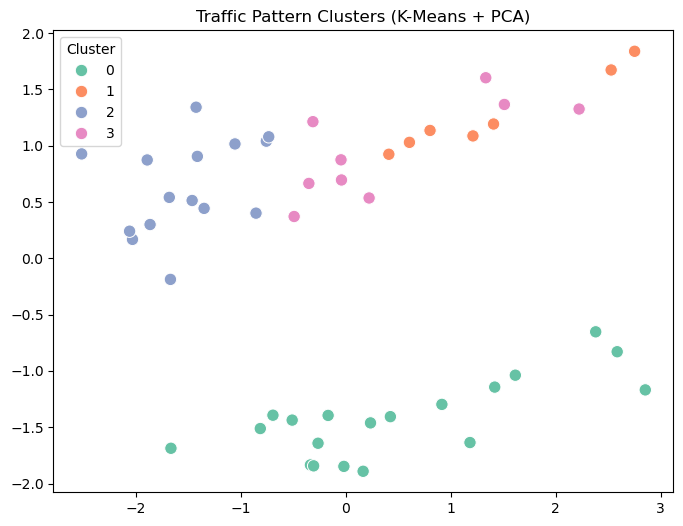

In [7]:
# Step 7: Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set2', s=80)
plt.title("Traffic Pattern Clusters (K-Means + PCA)")
plt.legend(title="Cluster")
plt.show()

In [8]:
# Step 8: Identify Congestion Zones
congestion = df.groupby('Cluster')['Speed'].mean().sort_values()
print("\nPotential Congestion Clusters (lowest average speed):")
print(congestion)


Potential Congestion Clusters (lowest average speed):
Cluster
0    25.000000
3    42.222222
2    52.133333
1    62.857143
Name: Speed, dtype: float64


C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_4172\1076105927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set3')


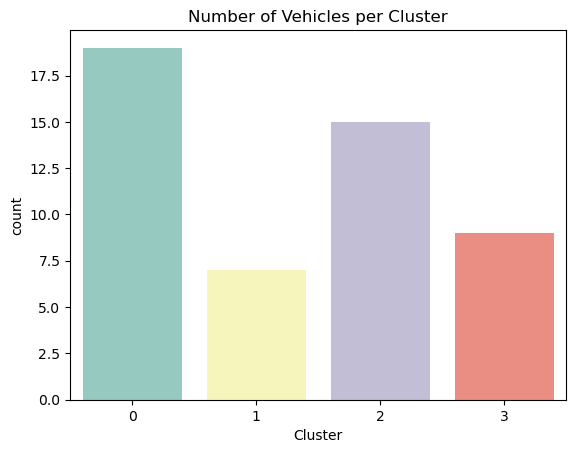

In [9]:
# Step 9: Visualization - Number of Vehicles per Cluster
sns.countplot(x='Cluster', data=df, palette='Set3')
plt.title("Number of Vehicles per Cluster")
plt.show()